# Retrieval-Augmented Generation Pipeline
---

A simple illustration of the Retrieval-Augmented Generation (RAG) pipeline is shown below.

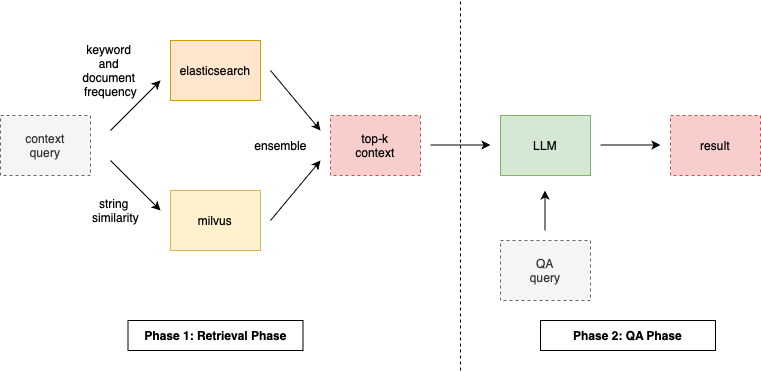

The pipeline consists of 2 phases:
1. Phase 1: Retrieve the context from 2 different database, then ensemble the retrieved context to extract high quality contexts.
2. Phase 2: These contexts can then be concatenated with the QA prompt to query the LLM.

In our framework, there are 2 ways to run this pipeline. First, retrieve the context and query the LLM in the same function. Second, independently retrieve the context and then query the LLM in 2 separate functions. The former is more streamlined while the latter offers more transparency.

In this assignment, we will be extracting specific data from financial statements with the RAG pipeline.

In the pipeline, we utilized 2 different database to retrieve context, i.e. Elasticsearch and Milvus, where both methods of retrieving context differs in terms of metrics. If both methods is used, the retrieved context from both methods will then be ensembled to extract the final top-k contexts.

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..')) # or the path to your source code
sys.path.insert(0, module_path)

In [ ]:
# Import Packages
from assignment_3.assignment_3_2.rag_pipeline import RAGPipeline

# Close-ended Question

## Introduction
In the assignment, we can freely select which database to retrieve, either individually or combined. You can start your tasks by creating a `RAGPipeline` object, and then use some interfaces to retrieve context from databases and ask the LLM some questions.

There is a sample answer for each question. You can click on `Example Solution` at the end of each question to view the sample prompt. However, we recommend that you try it yourself before checking the sample prompt.

#### Create a `RAGPipeline` object

Create a `RAGPipeline` object with the url of the vllm-published Llama model, your openai_api_key for accessing openai (if no openai model is used, set to `None`), your google key, your google cx,  name of the model, name of the table where document is stored, the embedding type, the collection name of the milvus database that stores the documents (default is set to `'jsonfiledb'`), and the database type to use (default is set to `'hybrid'`).

`model` options: `'gpt-3.5-turbo'`, `'llama70b'` (The model `llama70b` has not been fine-tuned, so its outputs may be inconsistent.)

`database_type` options: ES only - `'keyword'`, Milvus only - `'vector'`, Both - `'hybrid'` (Milvus database requires OpenAI API key set up at the assignment_1_2/env.py to use OpenAI's embedding. Otherwise, a placeholder (random) embedding will be used instead.)

Please note that `table_name` refers to the table in which you stored files in the database, and `llm_embedding_name` should be set to the same one as you used when building index in the assignment_1_2. If you cannot recall the name of the table you created in `assignment_1_2`, you can use table `default_table_3_2` with embedding `text-embedding-3-large` to finish this assignment. The source PDF file of `default_table_3_2` can be accessed via [Sample PDF](https://github.com/6estates/dsta-assignment/blob/main/assignment_1/assignment_1_2/data/ATSAR2023%2Bbursa.pdf).

In [ ]:
llama_url = 'http://10.12.0.12:8000/v1'
openai_api_key = ''
google_key = ''
google_cx = ''
model = 'llama70b'  # or 'gpt-3.5-turbo'
table_name = 'default_table_3_2'
llm_embedding_name = 'text-embedding-3-large'
milvus_collection_name = 'jsonfiledb'
database_type = 'hybrid'  # or 'keyword', 'vector'

rag = RAGPipeline(llama_url,
                  openai_api_key,
                  google_key,
                  google_cx,
                  model,
                  table_name,
                  llm_embedding_name,
                  milvus_collection_name,
                  database_type)

#### Retrieve context from databases

Define a question to retrieve context from the database. You can customize search options such as search range and the number of context pages (top_k).

Search range options: set `selected_pages` (LIST) OR set `from_page` (INT) and `to_page` (INT).

If you don't want to limit your search, just set `selected_pages` to `[]` and set `from_page` and `to_page` to `None`.

In [ ]:
# retrieve_result = rag.retrieve(context_question, selected_pages,
#                                    from_page, to_page, top_k)

The i<sup>th</sup> page of retrieved results can be accessed through the following variable:

In [ ]:
# retrieve_result['value'][i - 1]['text']

#### Prompt the LLM

Define your question and ask the model you chose.

In [ ]:
# qa_result = rag.qa_search(user_question, context_pages)

#### Merging retrieve and prompt

Retrieving context and prompting the model can also be done in one go. The RAG pipeline automatically combines your question and the context for you, and return the final answer directly.

In [ ]:
# result = rag.retrieve_and_search(context_question, user_question,
#                                  selected_pages, from_page, to_page,
#                                  top_k)

#### Set model, database type and document

There are 2 different models (gpt and llama) and 3 different database type (elasticsearch, milvus and hybrid) to set. You may also want to run the RAG pipeline on a different document. In case you need to change them, you can use these functions.

In [ ]:
# to change the model
# rag.set_model(model, backend)

# to change the database type
# can be set to keyword (elasticsearch), vector (milvus) or hybrid
# rag.set_database_type(database_type)

# to change the document
# rag.set_document(table_name, llm_embedding_name)

So far, you have learned how to use the RAGPipeline interfaces. It's time to give it a try!

## Qualitative Tasks
---

In this section, we will be extracting the qualitative information from the financial statement. These tasks are non-numerical tasks that provide analysis of a company's operations and background.
<br>
<br>
Fields to extract:
1. Company Name
2. Business Activities
3. Directors' List
4. Major Events

### Company Name

The company name normally appears in the first page that includes text information. For some companies, their names may end with *Pte Ltd*. Sometimes, the registration number is returned as the company name by the LLM, so do consider add a constraint in the QA prompt to filter it out.

In [ ]:
context_question = ''
user_question = ''

selected_pages = []
from_page =
to_page =
top_k =

result = rag.retrieve_and_search(context_question, user_question, selected_pages, from_page, to_page, top_k)

Let's check the result.

In [ ]:
print(result)

<details>
<summary>Example Solution</summary>
<h3><u>Context Prompt</u></h3>

What is the company's name? The company can normally be found at the first page of the document, or at major financial tables such as Balance Sheet, Income Statement and Cash Flow Statement.

<h3><u>QA Prompt</u></h3>

What is the name of the company reported in this financial report? Registration number is not considered the company name. Answer the company name only.

Given the above question, please answer in one sentence only with no additional explanations or descriptions. Do not start the answer with "The company reported..." or "The company's name..."  or any similar sentence opener. Return a direct answer to the question. If no related answer is found, return "".

</details>

### Business Activities

A company's business activities can be mentioned in multiple sections of the financial reports. Business activities usually include the services or products the company provides to its customers.

Context

In [ ]:
context_question = ''
selected_pages = []
from_page =
to_page =
top_k =

retrieve_result = rag.retrieve(context_question, selected_pages,
                                   from_page, to_page, top_k)

In [ ]:
# An example of the third retrieved page (Index starts from 0)
print(retrieve_result['value'][2]['text'])

QA

In [ ]:
user_question = ''

qa_result = rag.qa_search(user_question, retrieve_result)

In [ ]:
# Check the result
print(qa_result)

<details>
<summary>Example Solution</summary>
<h3><u>Context Prompt</u></h3>

Please find the company information related to the company's business activities or principal activities in terms of the services or products the company provide to their customer, including business activities or principal activities from the company's subsidiaries.

<h3><u>QA Prompt</u></h3>

As a professional financial analyst, please extract and explain the nature of the company's business activities as mentioned in the narrative sections of the document. List out the business activities along with their descriptions, include only business activities that are explicitly specified in the textual content, and do not make conjectures about the company's business activities from sources such as financial tables and references to other notes or sections. Remove duplications found on different pages by filtering them out.

If there is not enough evidence given in the page of the context to answer the above question, please filter out the page.

Return the results in a table form with a Markdown format with columns {Business Activities, Description}. Add a new column "Source Page" to the rightmost of the table for marking the source page of the data.

Please delete a row from the table if it meets any of the following conditions:
1. Only the "Source Page" box contains valid value.
2. Only the "Business Activities" box contains valid value.
3. Only the "Business Activities" box and the "Source Page" box contain valid values.
4. None of the boxes in the row contain valid values.

In each box, if no result can be found, return "N/A". If none of the rows contains valid values or no rows remain, return an empty string.

Do not output meaningless or duplicated words, output table header row only {Business Activities, Description, Source Page} if there is no proper answer to this question.

</details>

### Directors' List

It is common to find in a financial statement about the details of the company's directors. The details can include their name, title or position, the date of appointment, qualifications, compensation or remuneration and etc.

<details>
<summary>Example Solution</summary>
<h3><u>Context Prompt</u></h3>

Please find the company information related to the company's leadership, including the names of executive and non-executive directors, and their corresponding earnings structure that includes base salary, bonuses, stock options, equity awards, and other incentives.

<h3><u>QA Prompt</u></h3>

As a professional financial analyst, please use the given context to do the following. First, list out the company's leadership, including the names of executive and non-executive directors. Second, for each of the directors, highlight their qualification and achievements. Lastly, please match the director to their corresponding interest and compensation that includes base salary, bonuses, stock options, equity awards, and other incentives. If no corresponding interest and compensation can be found for any director, list out the director's names.

If there is not enough evidence given in the page of the context to answer the above question, please filter out the page.

Return the results in a table form with a Markdown format with columns {Director Name, Position}. Add a new column "Source Page" to the rightmost of the table for marking the source page of the data.

Please delete a row from the table if it meets any of the following conditions:
1. Only the "Source Page" box contains valid value.
2. Only the "Director Name" box contains valid value.
3. Only the "Director Name" box and the "Source Page" box contain valid values.
4. None of the boxes in the row contain valid values.

In each box, if no result can be found, return "N/A". If none of the rows contains valid values or no rows remain, return an empty string.

Do not output meaningless or duplicated words, output table header row only {Director Name, Position, Source Page} if there is no proper answer to this question.

</details>

### Major Event

A company's major events, such as new product launches, annual general meetings, tradeshows, regulatory filings and announcements and etc., can get people to have a better understanding of the company's strategic direction, challenges and growth prospects.

<details>
<summary>Example Solution</summary>
<h3>Context Prompt</h3>

Please find the company information related to the company's recent major events, including mergers, acquisitions, divestitures, new product launches, legal proceedings, anomalies in profit, industry dynamic or significant regulatory changes.

<h3>QA Prompt</h3>

As a professional financial analyst, please extract and explain the nature of the company's recent major events, including mergers, acquisitions, divestitures, new product launches, legal proceedings, anomalies in profit, industry dynamic or significant regulatory changes.

If there is not enough evidence given in the page of the context to answer the above question, please filter out the page.

Return the results in a table form with a Markdown format with columns {Event, Event Type, Date, Detail}. Add a new column "Source Page" to the rightmost of the table for marking the source page of the data.

Please delete a row from the table if it meets any of the following conditions:
1. Only the "Source Page" box contains valid value.
2. Only the "Event" box contains valid value.
3. Only the "Event" box and the "Source Page" box contain valid values.
4. None of the boxes in the row contain valid values.

In each box, if no result can be found, return "N/A". If none of the rows contains valid values or no rows remain, return an empty string.

Do not output meaningless or duplicated words, output table header row only {Event, Event Type, Date, Detail, Source Page} if there is no proper answer to this question.

</details>

## Quantitative Tasks
---
In this section, we will be extracting the quantitative information from the financial statement. These tasks are numerical tasks that provide analysis of a company's financial condition.
<br>
<br>
Fields to extract:
1. Balance Sheet Table
2. Current Ratio
3. Income Statement Table
4. Ratio

### Balance Sheet Table

The balance sheet provides a snapshot of a company's financial condition at a specific point in time and is a reliable tool to understand the financial health of a company. It details the company's assets, liabilities, and shareholders' equity.

In [ ]:
context_question = ''
selected_pages = []
from_page = None
to_page = None
top_k = 

retrieve_result = rag.retrieve(context_question, selected_pages,
                                   from_page, to_page, top_k)

user_question = ''

qa_result = rag.qa_search(user_question, retrieve_result)
print(qa_result)

We can use the QA result of `Balance Sheet Table` to calculate the `Current Ratio` for the next question.

In [ ]:
balance_sheet_table = qa_result

<details>
<summary>Example Solution</summary>
<h3><u>Context Prompt</u></h3>

Help me find the details of the Income Statements or Statement of Profit and Loss, which may contain information such as revenue, cost of goods sold, gross profit, net income.

<h3><u>QA Prompt</u></h3>

As a professional financial analyst, please follow these steps:
First, please extract all the data that form a complete Balance Sheet Table or a complete Statement of Financial Position Table. If possible, make sure the newly formed table consist of a complete set of information from Assets, Liabilities and Equities extracted from the same source tables in the context.
Second, return the results in a table form with a Markdown format. This table usually will have "Description" column to list each financial field name, and several "'Year" related columns, arranged in the descending order from left to right, to list all values for each year. The "Year" column attributes can be subdivided into "Group" and "Company" if necessary.
Third, add three new columns to the rightmost of the table:
1. A new column "Multiplier" (e.g. Hundreds, Thousands, Millions, Billions etc) for marking the multiplier of the values in each row. The Multiplier can only be identified when it is explicitly written in the context. Do not make conjectures about the Multiplier from the values in the table. The only exception to the rule is if there is an explicit reference to the multiplier in the column header. For example, if the "Year" column headers contain "000", it indicates "Thousands" as the Multiplier. If no Multiplier can be identified from the context, return "N/A".
2. A new column "Currency" (e.g. CNY, USD, RM, SGD, IDR, or other common currency) for marking the currency of the values in each row. Identify the Currency and return Currency for each row of the column. If no Currency can be identified, return "N/A".
3. A new column "Source Page" for marking the source page of the data.
Fourth, in each box, if no result can be found, return "N/A".
Please preserve the structure and content of the table in reference to the context page the table was extracted as much as possible.

</details>

### Current Ratio

The current ratio is a financial metric used to evaluate a company's ability to pay off its short-term liabilities with its short-term assets. The formula for calculating the current ratio is:

\begin{gather*}
 \text{Current Ratio} = \frac{\text{Current Assets}}{\text{Current Liabilities}}
\end{gather*}

This time, try to use the `balance_sheet_table` from the previous question as the context.

In [ ]:
user_question = f"""
For the following prompt, please return a straight answer to the question without any other description and as simple as possible. If no related answer is found, please explain why.
Given the context, find the most proper answer to the question.

### Balance Sheet Table
{balance_sheet_table}

### Question

(TODO: Define your question to ask the model to calculate the Current Ratio)
"""

qa_result = rag.qa_search(user_question)
print(qa_result)

<details>
<summary>Example Solution</summary>
<h3><u>QA Prompt</u></h3>

For the following prompt, please return a straight answer to the question without any other description and as simple as possible. If no related answer is found, please explain why.

Given the context, find the most proper answer to the question.

\### Balance Sheet Table

{balance_sheet_answer}


\### Question

You are an experienced financial analyst that is capable of providing in-depth analysis of financial statements. Please use the retrieved context to do the following steps.
First, extract the Total Current Assets, and Total Current Liabilities, for Group and Company if necessary.
Second, calculate the Current Ratio with the equation: Current Ratio = Total Current Assets / Total Current Liabilities.
Third, return the operands, the formula for Current Ratio(in mathematical form) and the calculation results in a table form with a Markdown format with rows {Total Current Assets, Total Current Liabilities, Formula, Current Ratio} and each year in the descending order from left to right as columns. For each calculation, please return the calculation result directly instead of equation with substituted values.
Forth, add two new columns to the rightmost of the table:
1. A new column "Multiplier" (e.g. Hundreds, Thousands, Millions, Billions etc) for marking the multiplier of the values in each row. If no Multiplier can be identified from the context, return “N/A”.
2. A new column "Currency" (e.g. CNY, USD, RM, SGD, IDR, or other common currency) for marking the currency of the values in each row. If no Currency can be identified from the context, return “N/A”.
Fifth, in each box, if no result can be found, return “N/A”.
For each year, if the Current Ratio can be calculated with the available information, please make sure to calculate the Current Ratio for that year.


<h3>QA Result</h3>
</details>

### Income Statement

The income statement is used by businesses to track financial performance over a specific accounting period. It provides a summary of a company's revenues, expenses, and profits or losses over that period. It also records metrics such as revenue, cost of goods sold, gross profit, operating expenses and etc.

<details>
<summary>Example Solution</summary>
<h3><u>Context Prompt</u></h3>

Help me find the details of the Income Statements or Statement of Profit and Loss, which may contain information such as revenue, cost of goods sold, gross profit, net income.

<h3><u>QA Prompt</u></h3>

As a professional financial analyst, please follow these steps:
First, identify the pages within the given context that form either the complete consolidated Income Statement Table or the complete consolidated Profit and Loss Statement Table. If possible, make sure the newly formed table consist of information such as Revenue, Cost of Goods Sold, Gross Profit, Expenses, and Net Profit extracted from the same source tables in the context.
Second, return the results in a table form with a Markdown format. This table usually will have "Description" column to list each financial field name, and several "'Year" related columns, arranged in the descending order from left to right, to list all values for each year. The "Year" column attributes can be subdivided into "Group" and "Company" if necessary.
Third, add three new columns to the rightmost of the table:
1. A new column "Multiplier" (e.g. Hundreds, Thousands, Millions, Billions etc) for marking the multiplier of the values in each row. The Multiplier can only be identified when it is explicitly written in the context. Do not make conjectures about the Multiplier from the values in the table. The only exception to the rule is if there is an explicit reference to the multiplier in the column header. For example, if the "Year" column headers contain "000", it indicates "Thousands" as the Multiplier. If no Multiplier can be identified from the context, return "N/A".
2. A new column "Currency" (e.g. CNY, USD, RM, SGD, IDR, or other common currency) for marking the currency of the values in each row. Identify the curreny and return Currency for each row of the column. If no Currency can be identified, return "N/A".
3. A new column "Source Page" for marking the source page of the data.
Fourth, in each box, if no result can be found, return "N/A".
Please preserve the structure and content of the table in reference to the context page the table was extracted as much as possible.

</details>

### Gross Margin

Gross margin provides insight into how well a company is managing its production costs relative to its sales. A higher gross margin indicates that the company is retaining more money from each dollar of sales to cover other operating expenses and profit. The formula for gross margin is:

\begin{gather*}
 \text{Gross Margin} = \left( \frac{\text{Revenue} - \text{COGS}}{\text{Revenue}} \right) \times 100
\end{gather*}

where COGS is the cost of goods sold.

Hint: Refer to the `Current Ratio` section and use the result of `Income Statement` as the context.

<details>
<summary>Example Solution</summary>
<h3><u>QA Prompt</u></h3>

For the following prompt, please return a straight answer to the question without any other description and as simple as possible. If no related answer is found, please explain why.

Given the context, find the most proper answer to the question.

\### Income Statement Table

{income_statement_answer}


\### Question

You are an experienced financial analyst that is capable of providing in-depth analysis of financial statements. Please use the retrieved context to do the following steps.
First, extract the Revenue and Cost of Sales, for Group and Company if necessary.
Second, calculate the Gross Margin with the equation: Gross Margin = (Revenue - Cost of Sales) / Revenue * 100%.
Third, return the operands, the formula for Gross Margin(in mathematical form) and the calculation results in a table form with a Markdown format with rows {Revenue, Cost of Sales, Formula, Gross Margin} and each year in the descending order from left to right as columns. For each calculation, please return the calculation result directly instead of equation with substituted values.
Forth, add two new columns to the rightmost of the table:
1. A new column "Multiplier" (e.g. Hundreds, Thousands, Millions, Billions etc) for marking the multiplier of the values in each row. If no Multiplier can be identified from the context, return “N/A”.
2. A new column "Currency" (e.g. CNY, USD, RM, SGD, IDR, or other common currency) for marking the currency of the values in each row. If no Currency can be identified from the context, return “N/A”.
Fifth, in each box, if no result can be found, return “N/A”.
For each year, if the Gross Margin can be calculated with the available information, please make sure to calculate the Gross Margin for that year.

</details>

## Recent News
---
Fields to extract:
1. Company's Activity and Event
2. Company's Financial Performance

### Search news using the CustomSearch Google API
We can retrieve a list of news given a query via the CustomSearch Google API. Using the RAGPipeline object where the Google API Key and the Google CX has been set, we can now use the `news_search` function.

`type_num` can be set to search news according to a set of filters as follows:

1. `type_num`=1: No filters set
2. `type_num`=2: Filter to search for only the news metatag
3. `type_num`=3: Filter to search for only the websites metatag

`sort` can be set according to either `date` and `relevance` to sort search results accordingly.

`top_k` can be set to limit the number of search results.

In [ ]:
# context = rag.news_search(key_words, type_num=1, sort="date", top_k=10)

### Filter news with LLM

However, the search results obtained with the Google API can be inconsistent with your expectation. Hence, you can use the LLM to further filter the search results as well as structure the result for better presentation.


In [ ]:
# qa_answer = rag.filter_news(question)

### Company's Activity and Event

It can be useful to search for a company's upcoming activities and events such as new product releases and annual general meetings.

Remember to use `news_search()` to retrieve the company name before filtering the search results with `filter_news()`.

In [ ]:
company_name = '' # can retrieve from the Qualitative Task section
search_question = '' # may include the company name to form a better search question
type_num = 1  # or 2, 3
sort = 'date'  # or 'relevance'
top_k =
context_result = rag.news_search(search_question, type_num, sort, top_k)
 

qa_question = f"""You are an experienced financial analyst that is capable of providing in-depth analysis of financial statements.

Given the company name as {company_name}, and the recent news of this company in json format as:

{context_result}

(TODO: ADD YOUR FILTERING RULES)

, select maximum 2 news, and output the title, link and snippet of each news.
"""
qa_answer = rag.filter_news(qa_question)

print(qa_answer)

<details>
<summary>Example Solution</summary>
<h3><u>Context Prompt</u></h3>

What is {company_name}'s upcoming activities and events?

<h3><u>QA Prompt</u></h3>

You are an experienced financial analyst that is capable of providing in-depth analysis of financial statements.

Given the company name as {company_name}, and the recent news of this company in json format as:

{context_result}

, filter and select the most relevant news which are possibly useful for financial analyst's analysis of this company from the following analysis perspective:
"Company's recent activities and events, such as:
- merger & acquisition
- lawsuit
- newly-launched product
- new business partnerships
- develop overseas market"

, select maximum 2 news, and output the title, link and snippet of each news.

</details>

### Company's Financial Performance

Although most financial information is encapsulated in the annual reports released by the company, we can still track the current financial metrics such as share price changes and product sales to get a snapshot of the the current financial performance of a company.

<details>
<summary>Example Solution</summary>
<h3><u>Context Prompt</u></h3>

How is {company_name}'s financial performance indicated by share price changes and product sales?

<h3>QA Prompt</h3>

You are an experienced financial analyst that is capable of providing in-depth analysis of financial statements.
Given the company name as {company_name}, and the recent news of this company in json format as:

{context_results}

, filter and select the most relevant news which are possibly useful for financial analyst's analysis of this company from the following analysis perspective:
"Company's financing activities:
- bond issurance
- share issurance/share buyback
- IPO/listing on stock market"

, select maximum 2 news, and output the title, link and snippet of each news.

</details>

# Open-ended Question

## Analysis of Company's Risk Factor

In this section, you are required to use the RAG Pipeline to provide a summary on the comprehensive analysis of the company's financial risk factor. The company's financial risk factor refers to the potential for a company to experience financial loss or instabilitiy, which can stem from long-term or short-term debts. You may use all the tools introduced in the previous section to help you solve this. You may also define sub-questions, which can be pieced together to solve the question. A hint section is provided in case you need some more help.

<details>
<summary>Hint</summary>

Consider design each financial risk factors as sub-questions and solve them individually. Then, compile the answers to formulate the summary.

Key components of financial risk include:

1. Credit Risk: The potential loss that might occur if counterparties (such as customers or other entities the company does business with) fail to meet their financial obligations.
2. Market Risk: The potential for losses due to changes in market conditions, such as fluctuations in asset prices, interest rates, foreign exchange rates, and commodity prices.
3. Liquidity Risk: The risk that a company will not be able to meet its short-term financial obligations due to an inability to convert assets into cash quickly or secure adequate funding.
4. Leverage: The risk associated with the use of borrowed funds. High leverage can amplify both potential returns and potential losses.

and other relevant financial risk.

Other factors such as litigation and legal cases and unexpected event may also play a role in affecting the financial performance of a company.

</details>

<details>
<summary>Example Solutions</summary>
<h3><u>Sub-Questions</u></h3>

Examples of sub-questions:<br>
1. Company's Litigation and Legal Cases<br>
2. Company's Outstanding Debts<br>
3. Company's Outstanding Debt<br>
4. Unexpected Events in Company Operations<br>
5. Company's Market Risk<br>
6. Company's Credit Risk<br>
7. Company's Liquidity Risk<br>

<h3><u>QA Prompt</u></h3>

You are an AI assistant to help process the document. The assistant answers should be clear and without any additional description.

Given the context, find the most proper answer to the question.

\### Legal Proceedings

{legal_cases}

\### Outstanding debts and insolvency risk

{outstanding_debt}

\### Unexpected events

{unexpected_events}

\### Market Risk Factor

{market_risk}

\### Credit Risk Factor

{credit_risk}

\### Liquidity Risk Factor

{liquidity_risk}

\### Question

As a professional financial analyst, given the following contexts, please do the following: First, summarize then analyze the contexts to paint a better picture for the risk factors of the company. Second, assess each risk factor by using {low, medium, high, unknown}.

Return the results in a table form with a Markdown format with columns {Risk Factors, Summary, Assessment}. if no result can be found, return "N/A".

Do not output meaningless or duplicated words, output table header row only {Risk Factors, Summary, Assessment} if there is no proper answer to this question.

</details>